In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g_data = pd.read_csv('./result/gradually.csv', header=0, index_col=0)

In [3]:
draw_data = g_data.iloc[:,0:7]
g_data.head(4)

,dataset,folder,best_epoch,auc_max,aupr_maxauc,rmse_maxauc,spearman_maxauc,spearman_maxauc.1,epoch_maxaupr,aupr_max,auc_maxaupr,rmse_maxaupr,spearman_maxaupr,epoch_minrmse,rmse_min,auc_minrmse,aupr_minrmse,spearman_minrmse
0,train,1,2,0.974729,0.972821,0.546062,0.818235,SignificanceResult(statistic=0.818235367825291...,2,0.972821,0.974729,0.546062,SignificanceResult(statistic=0.818235367825291...,1,0.544996,0.973712,0.972369,SignificanceResult(statistic=0.818731302393587...
1,vali,1,2,0.769055,0.212018,1.021227,0.412079,SignificanceResult(statistic=0.412079207220800...,2,0.212018,0.769055,1.021227,SignificanceResult(statistic=0.412079207220800...,1,0.967794,0.767683,0.207197,SignificanceResult(statistic=0.414848538832948...
2,train,2,4,0.970495,0.970009,0.573232,0.802102,SignificanceResult(statistic=0.802101542247586...,6,0.970701,0.970735,0.572479,SignificanceResult(statistic=0.802261636012845...,0,0.576594,0.970619,0.970276,SignificanceResult(statistic=0.803122233692989...
3,vali,2,4,0.780709,0.260875,0.911891,0.453449,SignificanceResult(statistic=0.453449096002472...,6,0.261161,0.777115,0.894866,SignificanceResult(statistic=0.458686586447733...,0,0.886766,0.779101,0.259558,SignificanceResult(statistic=0.453074715029874...


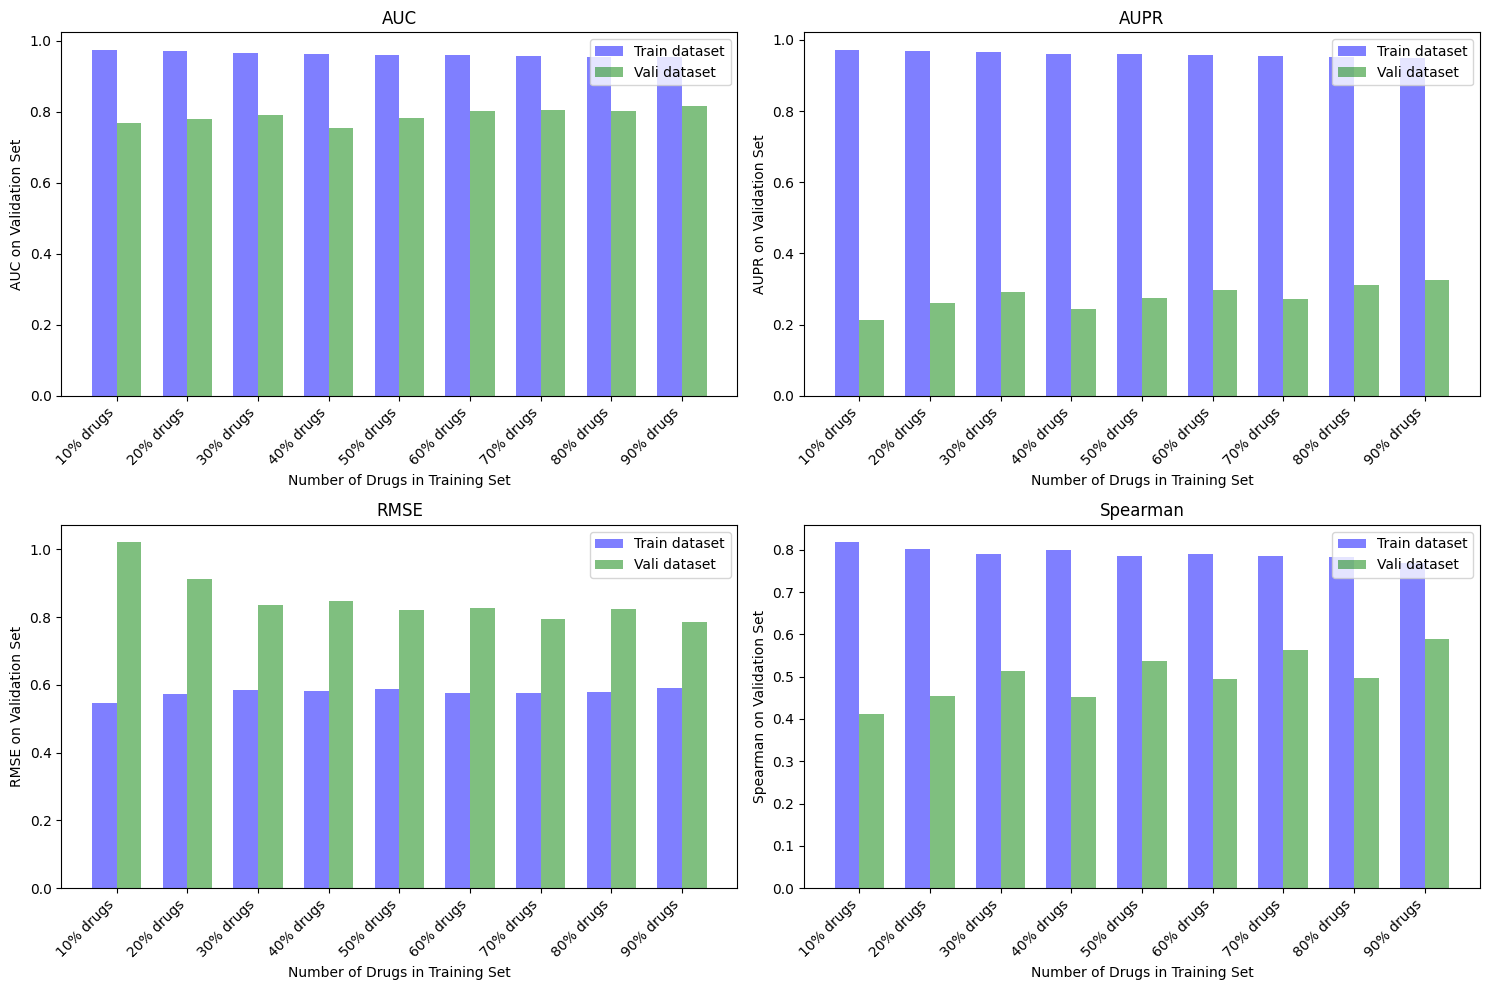

In [7]:
# 示例数据
categories = ['10% drugs', '20% drugs', '30% drugs', '40% drugs', '50% drugs', '60% drugs', '70% drugs', '80% drugs', '90% drugs']
bar_width = 0.35  # 条形宽度


# 提取不同指标的数据
data_group1_auc = draw_data[draw_data.dataset == 'train'].auc_max
data_group2_auc = draw_data[draw_data.dataset == 'vali'].auc_max
data_group1_aupr = draw_data[draw_data.dataset == 'train'].aupr_maxauc
data_group2_aupr = draw_data[draw_data.dataset == 'vali'].aupr_maxauc
data_group1_rmse = draw_data[draw_data.dataset == 'train'].rmse_maxauc
data_group2_rmse = draw_data[draw_data.dataset == 'vali'].rmse_maxauc
data_group1_spearman = draw_data[draw_data.dataset == 'train'].spearman_maxauc
data_group2_spearman = draw_data[draw_data.dataset == 'vali'].spearman_maxauc

# 计算条形的位置
bar_positions = np.arange(len(categories))
bar_positions_group1 = bar_positions
bar_positions_group2 = bar_positions_group1 + bar_width

# 创建2x2子图
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# AUC
axs[0, 0].bar(bar_positions_group1, data_group1_auc, width=bar_width, color='blue', alpha=0.5, label='Train dataset')
axs[0, 0].bar(bar_positions_group2, data_group2_auc, width=bar_width, color='green', alpha=0.5, label='Vali dataset')
axs[0, 0].set_title('AUC')
axs[0, 0].set_xlabel('Number of Drugs in Training Set')
axs[0, 0].set_ylabel('AUC on Validation Set')
axs[0, 0].legend()
axs[0, 0].set_xticks(bar_positions_group1 + bar_width / 2)
axs[0, 0].set_xticklabels(categories, rotation=45, ha='right')

# AUPR
axs[0, 1].bar(bar_positions_group1, data_group1_aupr, width=bar_width, color='blue', alpha=0.5, label='Train dataset')
axs[0, 1].bar(bar_positions_group2, data_group2_aupr, width=bar_width, color='green', alpha=0.5, label='Vali dataset')
axs[0, 1].set_title('AUPR')
axs[0, 1].set_xlabel('Number of Drugs in Training Set')
axs[0, 1].set_ylabel('AUPR on Validation Set')
axs[0, 1].legend()
axs[0, 1].set_xticks(bar_positions_group1 + bar_width / 2)
axs[0, 1].set_xticklabels(categories, rotation=45, ha='right')

# RMSE
axs[1, 0].bar(bar_positions_group1, data_group1_rmse, width=bar_width, color='blue', alpha=0.5, label='Train dataset')
axs[1, 0].bar(bar_positions_group2, data_group2_rmse, width=bar_width, color='green', alpha=0.5, label='Vali dataset')
axs[1, 0].set_title('RMSE')
axs[1, 0].set_xlabel('Number of Drugs in Training Set')
axs[1, 0].set_ylabel('RMSE on Validation Set')
axs[1, 0].legend()
axs[1, 0].set_xticks(bar_positions_group1 + bar_width / 2)
axs[1, 0].set_xticklabels(categories, rotation=45, ha='right')

# Spearman
axs[1, 1].bar(bar_positions_group1, data_group1_spearman, width=bar_width, color='blue', alpha=0.5, label='Train dataset')
axs[1, 1].bar(bar_positions_group2, data_group2_spearman, width=bar_width, color='green', alpha=0.5, label='Vali dataset')
axs[1, 1].set_title('Spearman')
axs[1, 1].set_xlabel('Number of Drugs in Training Set')
axs[1, 1].set_ylabel('Spearman on Validation Set')
axs[1, 1].legend()
axs[1, 1].set_xticks(bar_positions_group1 + bar_width / 2)
axs[1, 1].set_xticklabels(categories, rotation=45, ha='right')

# 调整布局
plt.tight_layout()

# 保存图形
plt.savefig("./result/图/figure3_1_all_metrics.pdf", format="pdf", bbox_inches="tight", dpi=600)

# 显示图形
plt.show()
8

In [15]:
draw_data

,dataset,folder,best_epoch,auc_max,aupr_maxauc,rmse_maxauc
0,train,1,2,0.974729,0.972821,0.546062
1,vali,1,2,0.769055,0.212018,1.021227
2,train,2,4,0.970495,0.970009,0.573232
3,vali,2,4,0.780709,0.260875,0.911891
4,train,3,7,0.965595,0.964965,0.583493
5,vali,3,7,0.790822,0.291329,0.835613
6,train,4,14,0.962243,0.961594,0.582537
7,vali,4,14,0.753202,0.243289,0.847812
8,train,5,0,0.960315,0.959472,0.587445
9,vali,5,0,0.782887,0.275550,0.822081
